In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import xgboost as xgb
import lightgbm as lgb
import numpy as np
from sklearn.model_selection import  RandomizedSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.model_selection import StratifiedKFold, RandomizedSearchCV
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
import seaborn as sns

In [ ]:
train_df_oversampled = pd.read_csv("data/oversampled_data_with_rfecv/train_oversampled.csv")
test_df_oversampled = pd.read_csv("data/oversampled_data_with_rfecv/test.csv")
X_train_oversampled = train_df_oversampled.drop(['FraudFound_P'],axis=1)
y_train_oversampled = train_df_oversampled['FraudFound_P']
X_test = test_df_oversampled.drop(['FraudFound_P'],axis=1)
y_test = test_df_oversampled['FraudFound_P']

In [25]:
train_df = pd.read_csv("data/data_without_oversampling/train.csv")
test_df = pd.read_csv("data/data_without_oversampling/test.csv")
X_train = train_df.drop(['FraudFound_P'],axis=1)
y_train = train_df['FraudFound_P']
X_test = test_df.drop(['FraudFound_P'],axis=1)
y_test = test_df['FraudFound_P']

## Logistic Regression without tuning

In [3]:
# Train logistic regression model
lr_model = LogisticRegression(max_iter=100)
lr_model.fit(X_train_oversampled, y_train_oversampled)

# Predictions
y_pred_lr = lr_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred_lr)
conf_matrix = confusion_matrix(y_test, y_pred_lr)
classification_rep = classification_report(y_test, y_pred_lr)
print("ROC AUC on validation:", roc_auc_score(y_test, y_pred_lr))

# Print results
print(f"Accuracy: {accuracy:.4f}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(classification_rep)

ROC AUC on validation: 0.6502904470358726
Accuracy: 0.6521
Confusion Matrix:
[[1882 1003]
 [  70  129]]
Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.65      0.78      2885
           1       0.11      0.65      0.19       199

    accuracy                           0.65      3084
   macro avg       0.54      0.65      0.49      3084
weighted avg       0.91      0.65      0.74      3084



C:\Users\harry\AppData\Roaming\Python\Python311\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


## Hyperparameter tuning of Logistic Regression Model

In [4]:
# logistic regression algo
lr_model = LogisticRegression(verbose=0,random_state=42)

# Define parameter grid
param_dict_lr = {
    'C': [0.1, 1, 10, 100],
    'penalty': ['l2', 'elasticnet'],
    'solver': ['liblinear', 'saga'],
    'max_iter': [500, 1000],
}


# Define cross-validation strategy
cv = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)

# Set up RandomizedSearchCV
search_lr = RandomizedSearchCV(
    estimator=lr_model,
    param_distributions=param_dict_lr,
    n_iter=20,  # try more for better results
    scoring='roc_auc',
    n_jobs=1,
    cv=cv,
    verbose=2,
    random_state=42
)

# Fit the search
search_lr.fit(X_train_oversampled, y_train_oversampled)

# Best params and score
print("Best Parameters:", search_lr.best_params_)
print("Best ROC AUC:", search_lr.best_score_)

Fitting 3 folds for each of 20 candidates, totalling 60 fits


C:\Users\harry\AppData\Roaming\Python\Python311\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ......C=100, max_iter=1000, penalty=l2, solver=saga; total time=   9.6s


C:\Users\harry\AppData\Roaming\Python\Python311\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ......C=100, max_iter=1000, penalty=l2, solver=saga; total time=   8.6s


C:\Users\harry\AppData\Roaming\Python\Python311\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ......C=100, max_iter=1000, penalty=l2, solver=saga; total time=  11.1s
[CV] END C=1, max_iter=1000, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END C=1, max_iter=1000, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END C=1, max_iter=1000, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END ..C=100, max_iter=500, penalty=l2, solver=liblinear; total time=   0.2s
[CV] END ..C=100, max_iter=500, penalty=l2, solver=liblinear; total time=   0.2s
[CV] END ..C=100, max_iter=500, penalty=l2, solver=liblinear; total time=   0.2s


C:\Users\harry\AppData\Roaming\Python\Python311\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ........C=10, max_iter=500, penalty=l2, solver=saga; total time=   3.8s


C:\Users\harry\AppData\Roaming\Python\Python311\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ........C=10, max_iter=500, penalty=l2, solver=saga; total time=   3.1s


C:\Users\harry\AppData\Roaming\Python\Python311\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ........C=10, max_iter=500, penalty=l2, solver=saga; total time=   3.0s
[CV] END ....C=1, max_iter=500, penalty=l2, solver=liblinear; total time=   0.1s
[CV] END ....C=1, max_iter=500, penalty=l2, solver=liblinear; total time=   0.1s
[CV] END ....C=1, max_iter=500, penalty=l2, solver=liblinear; total time=   0.0s


C:\Users\harry\AppData\Roaming\Python\Python311\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .........C=1, max_iter=500, penalty=l2, solver=saga; total time=   2.7s


C:\Users\harry\AppData\Roaming\Python\Python311\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .........C=1, max_iter=500, penalty=l2, solver=saga; total time=   2.4s


C:\Users\harry\AppData\Roaming\Python\Python311\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .........C=1, max_iter=500, penalty=l2, solver=saga; total time=   2.2s
[CV] END C=100, max_iter=1000, penalty=elasticnet, solver=liblinear; total time=   0.0s
[CV] END C=100, max_iter=1000, penalty=elasticnet, solver=liblinear; total time=   0.0s
[CV] END C=100, max_iter=1000, penalty=elasticnet, solver=liblinear; total time=   0.0s


C:\Users\harry\AppData\Roaming\Python\Python311\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .......C=100, max_iter=500, penalty=l2, solver=saga; total time=   2.2s


C:\Users\harry\AppData\Roaming\Python\Python311\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .......C=100, max_iter=500, penalty=l2, solver=saga; total time=   2.6s


C:\Users\harry\AppData\Roaming\Python\Python311\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .......C=100, max_iter=500, penalty=l2, solver=saga; total time=   2.9s
[CV] END ...C=1, max_iter=1000, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END ...C=1, max_iter=1000, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END ...C=1, max_iter=1000, penalty=l2, solver=liblinear; total time=   0.1s
[CV] END ..C=0.1, max_iter=500, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END ..C=0.1, max_iter=500, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END ..C=0.1, max_iter=500, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END .C=0.1, max_iter=1000, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END .C=0.1, max_iter=1000, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END .C=0.1, max_iter=1000, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END ...C=10, max_iter=500, penalty=l2, solver=liblinear; total time=   0.1s
[CV] END ...C=10, max_iter=500, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END ...C=10, max_iter=5

C:\Users\harry\AppData\Roaming\Python\Python311\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ......C=0.1, max_iter=1000, penalty=l2, solver=saga; total time=   8.4s


C:\Users\harry\AppData\Roaming\Python\Python311\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ......C=0.1, max_iter=1000, penalty=l2, solver=saga; total time=   7.1s


C:\Users\harry\AppData\Roaming\Python\Python311\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ......C=0.1, max_iter=1000, penalty=l2, solver=saga; total time=   4.4s


C:\Users\harry\AppData\Roaming\Python\Python311\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ........C=1, max_iter=1000, penalty=l2, solver=saga; total time=   5.1s


C:\Users\harry\AppData\Roaming\Python\Python311\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ........C=1, max_iter=1000, penalty=l2, solver=saga; total time=   5.5s


C:\Users\harry\AppData\Roaming\Python\Python311\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ........C=1, max_iter=1000, penalty=l2, solver=saga; total time=   6.1s
[CV] END .C=1, max_iter=500, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END .C=1, max_iter=500, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END .C=1, max_iter=500, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END C=10, max_iter=1000, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END C=10, max_iter=1000, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END C=10, max_iter=1000, penalty=elasticnet, solver=saga; total time=   0.0s


C:\Users\harry\AppData\Roaming\Python\Python311\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .......C=0.1, max_iter=500, penalty=l2, solver=saga; total time=   3.5s


C:\Users\harry\AppData\Roaming\Python\Python311\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .......C=0.1, max_iter=500, penalty=l2, solver=saga; total time=   2.8s
[CV] END .......C=0.1, max_iter=500, penalty=l2, solver=saga; total time=   3.0s
[CV] END C=0.1, max_iter=500, penalty=elasticnet, solver=liblinear; total time=   0.0s
[CV] END C=0.1, max_iter=500, penalty=elasticnet, solver=liblinear; total time=   0.0s
[CV] END C=0.1, max_iter=500, penalty=elasticnet, solver=liblinear; total time=   0.0s
[CV] END C=100, max_iter=500, penalty=elasticnet, solver=liblinear; total time=   0.0s
[CV] END C=100, max_iter=500, penalty=elasticnet, solver=liblinear; total time=   0.0s
[CV] END C=100, max_iter=500, penalty=elasticnet, solver=liblinear; total time=   0.0s
[CV] END C=0.1, max_iter=500, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END C=0.1, max_iter=500, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END C=0.1, max_iter=500, penalty=elasticnet, solver=saga; total time=   0.0s
Best Parameters: {'solver': 'liblinear', 'penalty': 'l2', 'max_iter': 

C:\Users\harry\AppData\Roaming\Python\Python311\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\harry\AppData\Roaming\Python\Python311\site-packages\sklearn\model_selection\_validation.py:547: FitFailedWarning: 
21 fits failed out of a total of 60.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
12 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\harry\AppData\Roaming\Python\Python311\site-packages\sklearn\model_selection\_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\harry\AppData\Roaming\Python\Python311\site-packages\sklea

In [5]:
best_model_lr = search_lr.best_estimator_
y_pred_proba = best_model_lr.predict_proba(X_test)[:, 1]
y_pred = (y_pred_proba >= 0.35).astype(int)

# Metrics
from sklearn.metrics import classification_report, roc_auc_score

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print("ROC AUC on validation:", roc_auc_score(y_test, y_pred_proba))


[[1645 1240]
 [   7  192]]
              precision    recall  f1-score   support

           0       1.00      0.57      0.73      2885
           1       0.13      0.96      0.24       199

    accuracy                           0.60      3084
   macro avg       0.56      0.77      0.48      3084
weighted avg       0.94      0.60      0.69      3084

ROC AUC on validation: 0.8020640464018532


## RandomForestClassifier Model without tuning

In [6]:
rf_model = RandomForestClassifier(class_weight="balanced", random_state=36)
rf_model.fit(X_train_oversampled, y_train_oversampled)
y_pred_rf = rf_model.predict(X_test)

# Evaluation
print("==== Random Forest ====")
print(f"Accuracy: {accuracy_score(y_test, y_pred_rf):.4f}")
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_rf))
print("Classification Report:")
print(classification_report(y_test, y_pred_rf))
print("ROC AUC on validation:", roc_auc_score(y_test, y_pred_rf))

==== Random Forest ====
Accuracy: 0.9339
Confusion Matrix:
[[2869   16]
 [ 188   11]]
Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.99      0.97      2885
           1       0.41      0.06      0.10       199

    accuracy                           0.93      3084
   macro avg       0.67      0.52      0.53      3084
weighted avg       0.90      0.93      0.91      3084

ROC AUC on validation: 0.5248652273499211


## Hyperparameter tuning of RandomForestClassifier model

In [7]:
# Random forest algo
rf_model = RandomForestClassifier(class_weight="balanced", verbose = 0,random_state=42)

# Define parameter grid
param_dict_rf = {
    'n_estimators': [100, 200, 300],  # Number of trees
    'max_depth': [None, 5, 10],  # Maximum depth of trees
    'min_samples_split': [2, 5, 10],  # Minimum samples required to split an internal node
    'min_samples_leaf': [1, 2, 4],  # Minimum samples required to be at a leaf node
    'bootstrap': [True, False],  
}

# Define cross-validation strategy
cv = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)

# Set up RandomizedSearchCV
search_rf = RandomizedSearchCV(
    estimator=rf_model,
    param_distributions=param_dict_rf,
    n_iter=20,  # try more for better results
    scoring='roc_auc',
    n_jobs=1,
    cv=cv,
    verbose=2,
    random_state=42
)

# Fit the search
search_rf.fit(X_train_oversampled, y_train_oversampled)

# Best params and score
print("Best Parameters:", search_rf.best_params_)
print("Best ROC AUC:", search_rf.best_score_)

Fitting 3 folds for each of 20 candidates, totalling 60 fits
[CV] END bootstrap=False, max_depth=10, min_samples_leaf=4, min_samples_split=5, n_estimators=300; total time=   8.6s
[CV] END bootstrap=False, max_depth=10, min_samples_leaf=4, min_samples_split=5, n_estimators=300; total time=  10.3s
[CV] END bootstrap=False, max_depth=10, min_samples_leaf=4, min_samples_split=5, n_estimators=300; total time=   9.7s
[CV] END bootstrap=False, max_depth=5, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   3.3s
[CV] END bootstrap=False, max_depth=5, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   5.3s
[CV] END bootstrap=False, max_depth=5, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   4.1s
[CV] END bootstrap=False, max_depth=5, min_samples_leaf=4, min_samples_split=5, n_estimators=300; total time=   6.8s
[CV] END bootstrap=False, max_depth=5, min_samples_leaf=4, min_samples_split=5, n_estimators=300; total time=   6.7s


In [8]:
best_model_rf = search_rf.best_estimator_
y_pred_proba = best_model_rf.predict_proba(X_test)[:, 1]
y_pred = (y_pred_proba >= 0.15).astype(int)

# Metrics
from sklearn.metrics import classification_report, roc_auc_score

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print("ROC AUC on validation:", roc_auc_score(y_test, y_pred_proba))

[[2409  476]
 [  86  113]]
              precision    recall  f1-score   support

           0       0.97      0.84      0.90      2885
           1       0.19      0.57      0.29       199

    accuracy                           0.82      3084
   macro avg       0.58      0.70      0.59      3084
weighted avg       0.92      0.82      0.86      3084

ROC AUC on validation: 0.8269405955252866


## XGBoost without tuning

In [9]:
xgb_model = xgb.XGBClassifier(n_estimators=100, use_label_encoder=False, eval_metric="logloss", random_state=42)
xgb_model.fit(X_train_oversampled, y_train_oversampled)
y_pred_xgb = xgb_model.predict(X_test)

# Evaluation
print("==== XGBoost ====")
print(f"Accuracy: {accuracy_score(y_test, y_pred_xgb):.4f}")
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_xgb))
print("Classification Report:")
print(classification_report(y_test, y_pred_xgb))
print("ROC AUC on validation:", roc_auc_score(y_test, y_pred_xgb))

c:\Python311\Lib\site-packages\xgboost\training.py:183: UserWarning: [22:01:53] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


==== XGBoost ====
Accuracy: 0.9326
Confusion Matrix:
[[2861   24]
 [ 184   15]]
Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.99      0.96      2885
           1       0.38      0.08      0.13       199

    accuracy                           0.93      3084
   macro avg       0.66      0.53      0.55      3084
weighted avg       0.90      0.93      0.91      3084

ROC AUC on validation: 0.5335289968037762


## Hyperparameter tuning of XGBoostClassifier

In [10]:
# Xgboost algo
xgb_model = xgb.XGBClassifier(eval_metric="logloss", random_state=42)

# Define parameter grid
param_dict_xgb = {
    'n_estimators': [100, 200],  # Number of boosting rounds
    'max_depth': [3, 5, 10, 15],  # Maximum depth of trees
    'learning_rate': [0.01, 0.1, 0.2],  # Step size at each iteration
    'subsample': [0.6, 0.8, 1.0],  # Fraction of samples used for training each tree
    'colsample_bytree': [0.6, 0.8, 1.0],  # Fraction of features used for each tree
    'gamma': [0, 0.1, 0.2],  # Minimum loss reduction required to make a further partition
    'reg_alpha': [0, 0.01, 0.1],  # L1 regularization 
    'reg_lambda': [0, 0.01, 0.1],  # L2 regularization
    'scale_pos_weight': [1, 5, 10],  # Controls balance of positive and negative weights
}

# Define cross-validation strategy
cv = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)

# Set up RandomizedSearchCV
search_xgb = RandomizedSearchCV(
    estimator=xgb_model,
    param_distributions=param_dict_xgb,
    n_iter=20,  # try more for better results
    scoring='roc_auc',
    n_jobs=1,
    cv=cv,
    verbose=2,
    random_state=42
)

# Fit the search
search_xgb.fit(X_train_oversampled, y_train_oversampled)

# Best params and score
print("Best Parameters:", search_xgb.best_params_)
print("Best ROC AUC:", search_xgb.best_score_)

Fitting 3 folds for each of 20 candidates, totalling 60 fits
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.01, max_depth=5, n_estimators=200, reg_alpha=0, reg_lambda=0, scale_pos_weight=1, subsample=0.6; total time=   0.7s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.01, max_depth=5, n_estimators=200, reg_alpha=0, reg_lambda=0, scale_pos_weight=1, subsample=0.6; total time=   0.8s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.01, max_depth=5, n_estimators=200, reg_alpha=0, reg_lambda=0, scale_pos_weight=1, subsample=0.6; total time=   0.7s
[CV] END colsample_bytree=0.6, gamma=0, learning_rate=0.1, max_depth=5, n_estimators=100, reg_alpha=0.01, reg_lambda=0.1, scale_pos_weight=5, subsample=1.0; total time=   0.3s
[CV] END colsample_bytree=0.6, gamma=0, learning_rate=0.1, max_depth=5, n_estimators=100, reg_alpha=0.01, reg_lambda=0.1, scale_pos_weight=5, subsample=1.0; total time=   0.3s
[CV] END colsample_bytree=0.6, gamma=0, learning_rate=0.1, max_de

In [11]:
best_model_xgb = search_xgb.best_estimator_
y_pred_proba = best_model_xgb.predict_proba(X_test)[:, 1]
y_pred = (y_pred_proba >= 0.025).astype(int)

# Metrics
from sklearn.metrics import classification_report, roc_auc_score

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print("ROC AUC on validation:", roc_auc_score(y_test, y_pred_proba))

[[   0 2885]
 [   0  199]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00      2885
           1       0.06      1.00      0.12       199

    accuracy                           0.06      3084
   macro avg       0.03      0.50      0.06      3084
weighted avg       0.00      0.06      0.01      3084

ROC AUC on validation: 0.8429060379889046


C:\Users\harry\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\harry\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\harry\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} i

## LightGBM without tuning

In [12]:
lgb_model = lgb.LGBMClassifier(n_estimators=100, random_state=42)
lgb_model.fit(X_train_oversampled, y_train_oversampled)
y_pred_lgb = lgb_model.predict(X_test)

# Evaluation
print("==== LightGBM ====")
print(f"Accuracy: {accuracy_score(y_test, y_pred_lgb):.4f}")
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_lgb))
print("Classification Report:")
print(classification_report(y_test, y_pred_lgb))
print("ROC AUC on validation:", roc_auc_score(y_test, y_pred_lgb))

[LightGBM] [Info] Number of positive: 11611, number of negative: 11611
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002836 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 4588
[LightGBM] [Info] Number of data points in the train set: 23222, number of used features: 18
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
==== LightGBM ====
Accuracy: 0.9355
Confusion Matrix:
[[2875   10]
 [ 189   10]]
Classification Report:
              precision    recall  f1-score   support

           0       0.94      1.00      0.97      2885
           1       0.50      0.05      0.09       199

    accuracy                           0.94      3084
   macro avg       0.72      0.52      0.53      3084
weighted avg       0.91      0.94      0.91      3084

ROC AUC on validation: 0.5233925258876706


## Hyperparameter tuning of LightGBM Model

In [13]:
# Lightgbm algo
lgb_model = lgb.LGBMClassifier(random_state=42, verbose = 0)

# Define parameter grid
param_dict_lgb = {
    'n_estimators': [100, 200],  # Number of boosting rounds
    'max_depth': [3, 5, 10, 15],  # Maximum depth of trees
    'learning_rate': [0.01, 0.1],  # Step size at each iteration
    'subsample': [0.6, 0.8, 1.0],  # Fraction of samples used for training each tree
    'colsample_bytree': [0.6, 0.8, 1.0],  # Fraction of features used for each tree
    'gamma': [0, 0.1, 0.2],  # Minimum loss reduction required to make a further partition
    'reg_alpha': [0, 0.01, 0.1],  # L1 regularization 
    'reg_lambda': [0, 0.01, 0.1],  # L2 regularization
    'scale_pos_weight': [1, 5, 10],  # Controls balance of positive and negative weights
}

# Define cross-validation strategy
cv = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)

# Set up RandomizedSearchCV
search_lgb = RandomizedSearchCV(
    estimator=lgb_model,
    param_distributions=param_dict_lgb,
    n_iter=20,  # try more for better results
    scoring='roc_auc',
    n_jobs=1,
    cv=cv,
    verbose=2,
    random_state=42
)

# Fit the search
search_lgb.fit(X_train_oversampled, y_train_oversampled)

# Best params and score
print("Best Parameters:", search_lgb.best_params_)
print("Best ROC AUC:", search_lgb.best_score_)

Fitting 3 folds for each of 20 candidates, totalling 60 fits
[LightGBM] [Warning] Unknown parameter: gamma
[LightGBM] [Warning] Unknown parameter: gamma
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] N

In [14]:
best_model_lgb = search_lgb.best_estimator_
y_pred_proba = best_model_lgb.predict_proba(X_test)[:, 1]
y_pred = (y_pred_proba >= 0.15).astype(int)

# Metrics
from sklearn.metrics import classification_report, roc_auc_score

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print("ROC AUC on validation:", roc_auc_score(y_test, y_pred_proba))

[LightGBM] [Warning] Unknown parameter: gamma
[[2097  788]
 [  27  172]]
              precision    recall  f1-score   support

           0       0.99      0.73      0.84      2885
           1       0.18      0.86      0.30       199

    accuracy                           0.74      3084
   macro avg       0.58      0.80      0.57      3084
weighted avg       0.94      0.74      0.80      3084

ROC AUC on validation: 0.8617890143960704


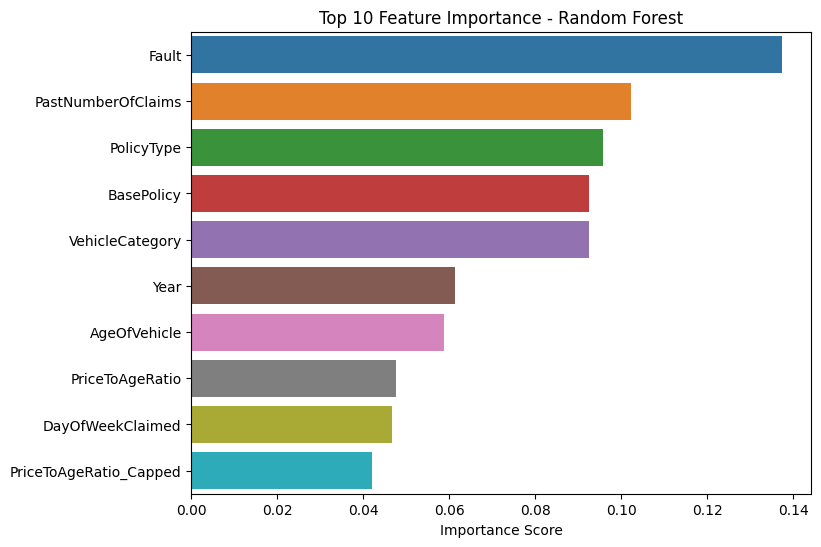

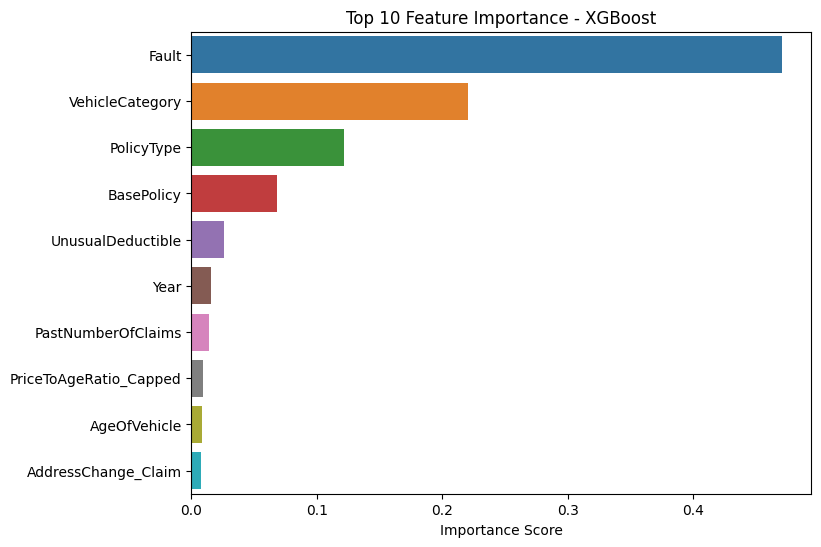

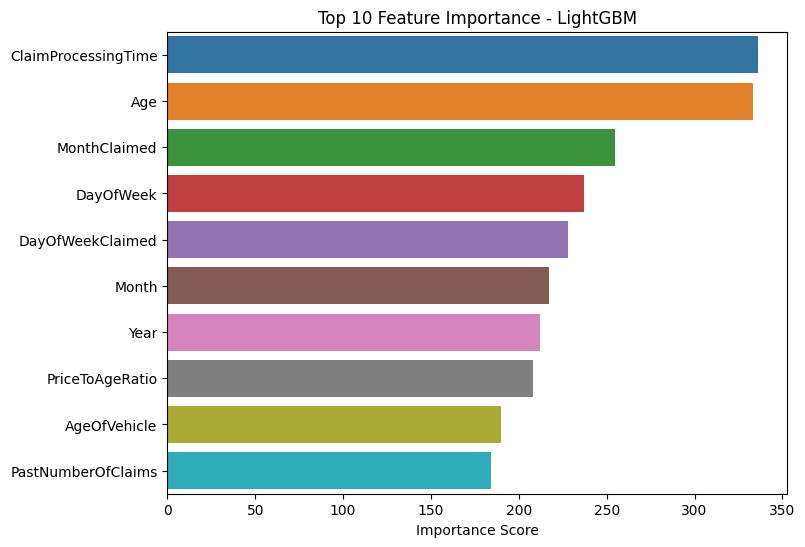

In [15]:
# Feature importance visualization for Random Forest
rf_importances = pd.Series(best_model_rf.feature_importances_, index=X_train_oversampled.columns).sort_values(ascending=False)
plt.figure(figsize=(8, 6))
sns.barplot(x=rf_importances.values[:10], y=rf_importances.index[:10])
plt.title("Top 10 Feature Importance - Random Forest")
plt.xlabel("Importance Score")
plt.show()

# Feature importance visualization for XGBoost
xgb_importances = pd.Series(best_model_xgb.feature_importances_, index=X_train_oversampled.columns).sort_values(ascending=False)
plt.figure(figsize=(8, 6))
sns.barplot(x=xgb_importances.values[:10], y=xgb_importances.index[:10])
plt.title("Top 10 Feature Importance - XGBoost")
plt.xlabel("Importance Score")
plt.show()

# Feature importance visualization for LightGBM
lgb_importances = pd.Series(best_model_lgb.feature_importances_, index=X_train_oversampled.columns).sort_values(ascending=False)
plt.figure(figsize=(8, 6))
sns.barplot(x=lgb_importances.values[:10], y=lgb_importances.index[:10])
plt.title("Top 10 Feature Importance - LightGBM")
plt.xlabel("Importance Score")
plt.show()

In [16]:
# Define base models
from sklearn.calibration import CalibratedClassifierCV
from sklearn.metrics import roc_auc_score

calibrated_rf = CalibratedClassifierCV(
    RandomForestClassifier(n_estimators=100, class_weight="balanced", random_state=36),
    method='isotonic', cv=3
)

voting_clf = VotingClassifier(
    estimators=[
        ('lr', make_pipeline(StandardScaler(), LogisticRegression(max_iter=2000, class_weight="balanced"))),
        ('rf', calibrated_rf),
        ('xgb', xgb.XGBClassifier(n_estimators=100, eval_metric="logloss", random_state=42, scale_pos_weight=12)),
        ('lgb', lgb.LGBMClassifier(n_estimators=100, class_weight='balanced', random_state=42))
    ],
    voting='soft'  # Change to 'hard' for majority voting
)

# Train voting classifier
voting_clf.fit(X_train_oversampled, y_train_oversampled)

# Predict
y_proba = voting_clf.predict_proba(X_test)[:, 1]
y_pred_voting = (y_proba >= 0.30).astype(int)
# Evaluate
print("==== Voting Classifier ====")
print(f"Accuracy: {accuracy_score(y_test, y_pred_voting):.4f}")
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_voting))
print("Classification Report:")
print(classification_report(y_test, y_pred_voting))
roc_auc = roc_auc_score(y_test, y_proba)
print(f"ROC AUC Score: {roc_auc:.4f}")

==== Voting Classifier ====
Accuracy: 0.8424
Confusion Matrix:
[[2480  405]
 [  81  118]]
Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.86      0.91      2885
           1       0.23      0.59      0.33       199

    accuracy                           0.84      3084
   macro avg       0.60      0.73      0.62      3084
weighted avg       0.92      0.84      0.87      3084

ROC AUC Score: 0.8547


In [23]:
from sklearn.calibration import CalibratedClassifierCV

calibrated_rf = CalibratedClassifierCV(
    RandomForestClassifier(n_estimators=100, class_weight="balanced", random_state=36),
    method='isotonic', cv=3
)

voting_clf = VotingClassifier(
    estimators=[
        ('lr', make_pipeline(StandardScaler(), LogisticRegression(max_iter=2000, class_weight="balanced"))),
        ('rf', calibrated_rf),
        ('xgb', xgb.XGBClassifier(n_estimators=100, eval_metric="logloss", random_state=42, scale_pos_weight=12)),
        ('lgb', lgb.LGBMClassifier(n_estimators=100, class_weight='balanced', random_state=42))
    ],
    voting='soft'  # Change to 'hard' for majority voting
)

# Train voting classifier
voting_clf.fit(X_train_oversampled, y_train_oversampled)

# Predict
y_proba = voting_clf.predict_proba(X_test)[:, 1]
from sklearn.metrics import precision_recall_curve, f1_score, roc_auc_score

precisions, recalls, thresholds = precision_recall_curve(y_test, y_proba)

f1_scores = 2 * (precisions * recalls) / (precisions + recalls + 1e-6)
best_threshold = thresholds[f1_scores.argmax()]
print(f"Best Threshold by F1: {best_threshold:.2f}, F1-score: {f1_scores.max():.3f}")

roc_auc = roc_auc_score(y_test, y_proba)
print(f"ROC AUC Score: {roc_auc:.4f}")

# Use the new threshold
y_pred_best = (y_proba >= best_threshold).astype(int)
print(classification_report(y_test, y_pred_best, digits=3))

# Model Update Summary (Voting Classifier)

# - Applied class balancing techniques: 'class_weight' and 'scale_pos_weight' for base models
# - Calibrated the Random Forest classifier using isotonic regression for better probability estimates
# - Used 'soft' voting to average predicted probabilities across models
# - Tuned the classification threshold using precision-recall curve to optimize for F1-score of fraud class (label=1)
# ➤ These changes aim to improve fraud detection performance, especially recall and F1, on the imbalanced test set

Best Threshold by F1: 0.33, F1-score: 0.339
ROC AUC Score: 0.8547
              precision    recall  f1-score   support

           0      0.964     0.896     0.928      2885
           1      0.253     0.513     0.339       199

    accuracy                          0.871      3084
   macro avg      0.608     0.704     0.634      3084
weighted avg      0.918     0.871     0.890      3084



In [24]:
import joblib
import json

# Save the trained model
joblib.dump(voting_clf, 'voting_classifier_with_f1_optimized_threshold.pkl')

# Save threshold
with open('best_threshold.json', 'w') as f:
    json.dump({'threshold': float(best_threshold)}, f)

In [22]:
# Imports
from sklearn.model_selection import StratifiedKFold, RandomizedSearchCV
from sklearn.pipeline import make_pipeline
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.metrics import make_scorer, f1_score, roc_auc_score
import xgboost as xgb
import lightgbm as lgb
import numpy as np

# Logistic Regression with StandardScaler
lr_model = make_pipeline(
    StandardScaler(),
    LogisticRegression(max_iter=2000, class_weight='balanced', random_state=42)
)

# Random Forest
rf_model = RandomForestClassifier(class_weight='balanced', random_state=42)

# XGBoost with imbalance handling
xgb_model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss', scale_pos_weight=12, random_state=42)

# LightGBM
lgb_model = lgb.LGBMClassifier(class_weight='balanced', random_state=42)

voting_clf = VotingClassifier(
    estimators=[
        ('lr', lr_model),
        ('rf', rf_model),
        ('xgb', xgb_model),
        ('lgb', lgb_model)
    ],
    voting='soft'
)

pipeline = Pipeline([
    ('smote', SMOTE(random_state=42)),
    ('voting', voting_clf)
])

param_dist = {
    'voting__rf__n_estimators': [100, 200, 300],
    'voting__rf__max_depth': [5, 10, None],
    'voting__xgb__learning_rate': [0.01, 0.1, 0.2],
    'voting__xgb__n_estimators': [100, 200],
    'voting__lgb__n_estimators': [100, 200],
    'voting__lgb__learning_rate': [0.01, 0.1]
}

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
scorer = make_scorer(f1_score, pos_label=1)

random_search = RandomizedSearchCV(
    pipeline,
    param_distributions=param_dist,
    n_iter=10,
    scoring=scorer,
    cv=skf,
    verbose=2,
    random_state=42,
    n_jobs=-1
)

# Fit on training data
random_search.fit(X_train_oversampled, y_train_oversampled)

# Best model results
print("Best F1-score (fraud class):", random_search.best_score_)
print("Best parameters:")
print(random_search.best_params_)

from sklearn.metrics import classification_report, confusion_matrix
roc_auc = roc_auc_score(y_test, y_proba)
print(f"ROC AUC Score: {roc_auc:.4f}")

y_pred_best = random_search.predict(X_test)
print(confusion_matrix(y_test, y_pred_best))
print(classification_report(y_test, y_pred_best, digits=3))

Fitting 5 folds for each of 10 candidates, totalling 50 fits


c:\Python311\Lib\site-packages\xgboost\training.py:183: UserWarning: [22:30:50] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Best F1-score (fraud class): 0.9625014423542957
Best parameters:
{'voting__xgb__n_estimators': 200, 'voting__xgb__learning_rate': 0.1, 'voting__rf__n_estimators': 100, 'voting__rf__max_depth': None, 'voting__lgb__n_estimators': 200, 'voting__lgb__learning_rate': 0.1}
ROC AUC Score: 0.8547
[[2797   88]
 [ 157   42]]
              precision    recall  f1-score   support

           0      0.947     0.969     0.958      2885
           1      0.323     0.211     0.255       199

    accuracy                          0.921      3084
   macro avg      0.635     0.590     0.607      3084
weighted avg      0.907     0.921     0.913      3084



In [ ]:
from sklearn.model_selection import StratifiedKFold, cross_val_predict
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_recall_curve, roc_auc_score
import xgboost as xgb
import lightgbm as lgb
import numpy as np

# Base models with class weightings
base_models = [
    ('lr', make_pipeline(StandardScaler(), LogisticRegression(max_iter=2000, class_weight="balanced"))),
    ('rf', RandomForestClassifier(n_estimators=100, class_weight="balanced", random_state=36)),
    ('xgb', xgb.XGBClassifier(n_estimators=100, eval_metric="logloss", random_state=42, scale_pos_weight=12)),
    ('lgb', lgb.LGBMClassifier(n_estimators=100, class_weight='balanced', random_state=42))
]

# Stronger meta model
meta_model = RandomForestClassifier(n_estimators=100, class_weight="balanced", random_state=42)

# Stacking classifier (no oversampled data used here!)
stack_clf = StackingClassifier(
    estimators=base_models,
    final_estimator=meta_model,
    cv=5,
    passthrough=True,
    n_jobs=-1
)

# Full pipeline with SMOTE
pipeline = Pipeline([
    ('smote', SMOTE(random_state=42)),
    ('stacking', stack_clf)
])

# StratifiedKFold
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Cross-validated predictions on training data (simulate test set)
y_proba_cv = cross_val_predict(pipeline, X_train, y_train, cv=skf, method='predict_proba', n_jobs=-1)[:, 1]

# Find best threshold
precisions, recalls, thresholds = precision_recall_curve(y_train, y_proba_cv)
f1_scores = 2 * (precisions * recalls) / (precisions + recalls + 1e-6)
best_threshold = thresholds[f1_scores.argmax()]
print(f"Best Threshold by F1: {best_threshold:.2f}, F1-score: {f1_scores.max():.3f}")

# Refit final model on full training data
pipeline.fit(X_train, y_train)

# Predict on real test set
y_proba_test = pipeline.predict_proba(X_test)[:, 1]
y_pred_test = (y_proba_test >= best_threshold).astype(int)

roc_auc = roc_auc_score(y_test, y_proba_test)
print(f"ROC AUC Score: {roc_auc:.4f}")

# Evaluation
print("==== Final Stacking Classifier with CV + SMOTE ====")
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_test))
print("Classification Report:")
print(classification_report(y_test, y_pred_test, digits=3))

# Model Update Summary (Stacking Classifier)
# - Replaced training on oversampled data with StratifiedKFold cross-validation
# - Applied SMOTE inside each fold using a pipeline to avoid data leakage
# - Used a stronger meta-model (Random Forest instead of Logistic Regression)
# - Tuned the decision threshold based on the best F1-score from precision-recall curve
# These changes aim to improve fraud class (label=1) recall and F1-score while keeping evaluation realistic

[LightGBM] [Info] Number of positive: 9289, number of negative: 9289
[LightGBM] [Info] Number of positive: 9289, number of negative: 9289
[LightGBM] [Info] Number of positive: 9289, number of negative: 9289
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.027829 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 4185
[LightGBM] [Info] Number of data points in the train set: 18578, number of used features: 18
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.028099 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 4170
[LightGBM] [Info] Number of data points in the train set: 18578, number of used features: 18
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGB